Data cleaning and pre processing

In [1]:
%pip install pandas
import pandas as pd
import numpy as np


df = pd.read_csv('Parking_Violations_-_2023_-_Present.csv')

# Display basic info
print("Dataset Overview:\n")
print(df.info())

# Check for missing values
print("\nMissing Values Per Column:\n")
print(df.isnull().sum())

# Drop rows that are missing values
df.dropna(inplace=True)

# # Drop specified columns
# df.drop(columns=columns_to_drop, inplace=True)


# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

# # Standardizing column names (convert to lowercase and replace spaces with underscores)
# df.columns = df.columns.str.lower().str.replace(' ', '_')

# Display sample rows after cleaning
print("\nCleaned Dataset Sample:\n")
print(df.info())

# Check for missing values
print("\nMissing Values Per Column:\n")
print(df.isnull().sum())

Note: you may need to restart the kernel to use updated packages.
Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123832 entries, 0 to 123831
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   X              96717 non-null   float64
 1   Y              96717 non-null   float64
 2   ticket_number  123832 non-null  object 
 3   issued_date    123832 non-null  object 
 4   location       123517 non-null  object 
 5   description    123832 non-null  object 
 6   status         123832 non-null  object 
 7   amount         123832 non-null  float64
 8   LONG           96717 non-null   float64
 9   LAT            96717 non-null   float64
 10  ObjectId       123832 non-null  int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 10.4+ MB
None

Missing Values Per Column:

X                27115
Y                27115
ticket_number        0
issued_date          0
location           315
descrip

cleaning location details

In [2]:
# # Create a dictionary to map (LAT, LONG) to a standardized location name
# location_mapping = {}

# # Iterate through the dataframe and populate the dictionary
# for index, row in df.iterrows():
#     lat_long = (row['LAT'], row['LONG'])
#     if lat_long not in location_mapping:
#         location_mapping[lat_long] = row['location']

# # Create a new column 'cleaned_location' using the mapping
# df['cleaned_location'] = df.apply(lambda row: location_mapping[(row['LAT'], row['LONG'])], axis=1)

# # Display the updated dataframe
# print(df[['location', 'cleaned_location', 'LAT', 'LONG']])

In [3]:
from difflib import SequenceMatcher
import numpy as np
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform

# Function to check if two strings are similar
def are_strings_similar(str1, str2, threshold=0.8):
    return SequenceMatcher(None, str1.lower(), str2.lower()).ratio() > threshold

# Function to find similar locations
def find_similar_location(lat, long, location, existing_locations, coord_threshold=0.001):
    for ex_lat, ex_long, ex_loc in existing_locations:
        # Check if coordinates are within threshold
        if (abs(lat - ex_lat) <= coord_threshold and 
            abs(long - ex_long) <= coord_threshold and 
            are_strings_similar(location, ex_loc)):
            return ex_loc
    return None

# Create a list to store unique locations
unique_locations = []
location_mapping = {}

# First pass: Identify unique locations
for index, row in df.iterrows():
    lat, long = row['LAT'], row['LONG']
    location = row['location']
    
    # Check if similar location exists
    similar_loc = find_similar_location(lat, long, location, unique_locations)
    
    if similar_loc:
        location_mapping[(lat, long)] = similar_loc
    else:
        unique_locations.append((lat, long, location))
        location_mapping[(lat, long)] = location

# Create cleaned_location column
df['cleaned_location'] = df.apply(
    lambda row: location_mapping[(row['LAT'], row['LONG'])], 
    axis=1
)

# Display results
print(df[['location', 'cleaned_location', 'LAT', 'LONG']])

                location  cleaned_location        LAT       LONG
0        300 WAVERLY AVE   300 WAVERLY AVE  43.040398 -76.132407
1       700 COMSTOCK AVE  700 COMSTOCK AVE  43.038377 -76.129968
3        300 WAVERLY AVE   300 WAVERLY AVE  43.040398 -76.132407
4       700 COMSTOCK AVE  700 COMSTOCK AVE  43.038277 -76.129945
5       700 COMSTOCK AVE  700 COMSTOCK AVE  43.038277 -76.129945
...                  ...               ...        ...        ...
123826    800 IRVING AVE    800 IRVING AVE  43.038324 -76.139032
123827    800 IRVING AVE    800 IRVING AVE  43.038324 -76.139032
123828    700 IRVING AVE    700 IRVING AVE  43.039491 -76.138067
123829    800 IRVING AVE    800 IRVING AVE  43.038324 -76.139032
123830    700 IRVING AVE    700 IRVING AVE  43.039677 -76.138067

[96717 rows x 4 columns]


In [4]:
df.drop(columns=['location'], inplace=True)
print(df.head())


              X             Y ticket_number             issued_date  \
0 -8.475021e+06  5.318123e+06     230900300  2023/01/19 09:44:00+00   
1 -8.474749e+06  5.317815e+06     230700367  2023/01/19 09:44:00+00   
3 -8.475021e+06  5.318123e+06     230900301  2023/01/19 09:45:00+00   
4 -8.474747e+06  5.317800e+06     230700368  2023/01/19 09:45:00+00   
5 -8.474747e+06  5.317800e+06     230700369  2023/01/19 09:45:00+00   

                               description               status  amount  \
0  OVERTIME PRKNG MON-SAT 9AM-6PM CO15-383         Paid In Full    25.0   
1         UNINSPECTED/ ALL TIMES VTL 306-B         Paid In Full    25.0   
3  OVERTIME PRKNG MON-SAT 9AM-6PM CO15-383         Paid In Full    25.0   
4  OVERTIME PRKNG MON-SAT 9AM-6PM CO15-383  Paid In Collections    25.0   
5     FIRE HYDRANT/ALL TIMES CO15-316 (A)4  Paid In Collections    60.0   

        LONG        LAT  ObjectId  cleaned_location  
0 -76.132407  43.040398         1   300 WAVERLY AVE  
1 -76.129968  

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 96717 entries, 0 to 123830
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X                 96717 non-null  float64
 1   Y                 96717 non-null  float64
 2   ticket_number     96717 non-null  object 
 3   issued_date       96717 non-null  object 
 4   description       96717 non-null  object 
 5   status            96717 non-null  object 
 6   amount            96717 non-null  float64
 7   LONG              96717 non-null  float64
 8   LAT               96717 non-null  float64
 9   ObjectId          96717 non-null  int64  
 10  cleaned_location  96717 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 8.9+ MB
None


Check Unique Violation Categories

In [6]:
# Unique types of parking violations
unique_violations = df['description'].unique()
print("\nUnique Parking Violations:\n", unique_violations)


Unique Parking Violations:
 ['OVERTIME PRKNG MON-SAT 9AM-6PM CO15-383'
 'UNINSPECTED/ ALL TIMES VTL 306-B' 'FIRE HYDRANT/ALL TIMES CO15-316 (A)4'
 'ODD/EVEN PARKING NOV-MAR CO15-318 (A)2'
 'UNREGSTRD/UNAFFIXD/ALL VTL401-1/403-1'
 'NONE/ONE LICENSE PLATE/ALL VTL402-1'
 'NO PARKING ANY TIME CO15-316 (A)14' 'OBSTRUCTING TRAFFIC/ALL CO15-317'
 'NO STPNG HERE TO CNR/ALL CO15-316(A)6'
 'NO PRKNG HERE TO CNR/ALL CO15-316(A)6'
 'NO STOPPING ANY TIME CO15-316 (A)14'
 'ODD/EVEN PARKING APR-OCT CO15-318 (A)2'
 'PARKED IN LOADING ZONE/ALL CO15-329'
 'PARKED ON SIDEWALK/ALL CO15-316 (A)1' 'LEFT WHEELS TO CURB/ALL CO15-301'
 'PRKD BTWN SIDEWALK/CURB CO15-316 (A)1'
 'PRKD BLOCKING CRSSWLK/ALL CO15-316 (A)5' 'MISC'
 'NO PERMIT/ALL TIMES CO15-365' 'LIMITED PARKING ONLY/ALL TIMES CO15-365'
 'HANDICAP PRKNG ON-STR /ALL VTL1203(B)2'
 'HANDICAP PARKING-OFF STREET VTL1203C4'
 'LIMITED PARKING ONLY 9 AM-6 PM CO15-365'
 'PRKD BLOCKING DRVWY/ALL CO15-316 (A)2'
 'FIRE LANE/ALL TIMES CO15-316 (A)14'
 'NO STNDNG

Count Violations by Type

In [7]:
# Count occurrences of each violation type
violation_counts = df['description'].value_counts()

# Display top 10 most common violations
print("\nTop 10 Most Common Parking Violations:\n", violation_counts.head(10))


Top 10 Most Common Parking Violations:
 description
OVERTIME PRKNG MON-SAT 9AM-6PM CO15-383    33254
ODD/EVEN PARKING APR-OCT CO15-318 (A)2     12881
ODD/EVEN PARKING NOV-MAR CO15-318 (A)2     10037
UNINSPECTED/ ALL TIMES VTL 306-B            8430
UNREGSTRD/UNAFFIXD/ALL VTL401-1/403-1       6180
NO STOPPING ANY TIME CO15-316 (A)14         4423
NO PARKING ANY TIME CO15-316 (A)14          2816
PARKED IN LOADING ZONE/ALL CO15-329         2621
NO STPNG HERE TO CNR/ALL CO15-316(A)6       2509
NONE/ONE LICENSE PLATE/ALL VTL402-1         1987
Name: count, dtype: int64


Violation categories


In [8]:
def categorize_violation(violation):
    # Time-based violations
    if any(keyword in violation for keyword in ['OVERTIME', 'AM-', 'PM-', 'AM -', 'PM -']):
        return 'Time-Based'
    
    # Seasonal parking
    elif 'ODD/EVEN PARKING' in violation:
        return 'Seasonal'
    
    # Safety violations
    elif any(keyword in violation for keyword in ['FIRE', 'OBSTRUCTING TRAFFIC']):
        return 'Safety'
    
    # Vehicle documentation
    elif any(keyword in violation for keyword in ['UNINSPECTED', 'UNREGSTRD', 'LICENSE PLATE']):
        return 'Documentation'
    
    # Location-based violations
    elif any(keyword in violation for keyword in ['NO PARKING', 'NO STOPPING', 'NO STANDING', 'NO STPNG']):
        return 'Location-Based'
    
    # Accessibility violations
    elif 'HANDICAP' in violation:
        return 'Accessibility'
    
    # Improper parking method
    elif any(keyword in violation for keyword in ['WHEELS TO CURB', 'FROM CURB', 'DOUBLE PARKING', 'ANGLE']):
        return 'Improper Parking'
    
    # Special zone violations
    elif any(keyword in violation for keyword in ['LOADING ZONE', 'BUS STOP', 'TAXI STAND']):
        return 'Special Zone'
    
    # Property violations
    elif any(keyword in violation for keyword in ['SIDEWALK', 'CRSSWLK', 'DRVWY', 'GRASS']):
        return 'Property'
    
    else:
        return 'Other'

# Create new column with violation categories
df['violation_category'] = df['description'].apply(categorize_violation)

# Display distribution of violation categories
print("\nViolation Categories Distribution:")
print(df['violation_category'].value_counts())



Violation Categories Distribution:
violation_category
Time-Based          33465
Seasonal            22918
Documentation       16597
Location-Based       9789
Other                3454
Safety               3109
Special Zone         2690
Accessibility        1885
Improper Parking     1407
Property             1403
Name: count, dtype: int64


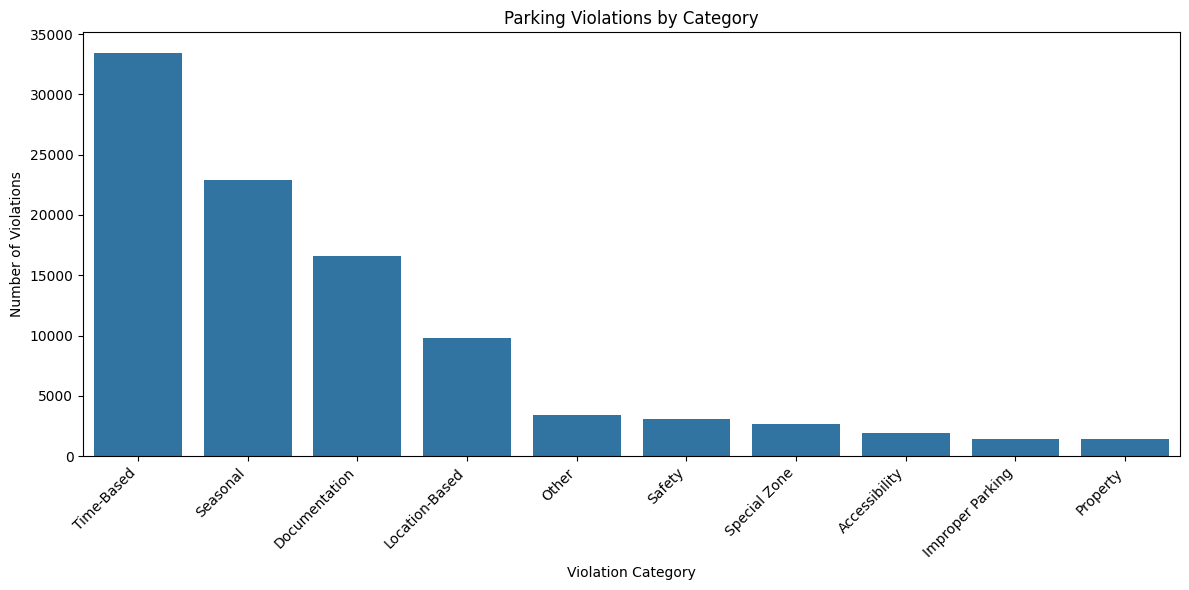

In [9]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create a DataFrame with violation categories and their counts
violation_category_counts = df['violation_category'].value_counts().reset_index()
violation_category_counts.columns = ['Category', 'Count']

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=violation_category_counts, x='Category', y='Count')

# Customize plot
plt.xticks(rotation=45, ha='right')
plt.title('Parking Violations by Category')
plt.xlabel('Violation Category')
plt.ylabel('Number of Violations')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()


Violations that collect most revenue

/var/folders/b6/8kmpl5ms6hsgvt6gg3fhkn3h0000gn/T/ipykernel_31270/1876991483.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('violation_category')['amount'].sum().reset_index(),


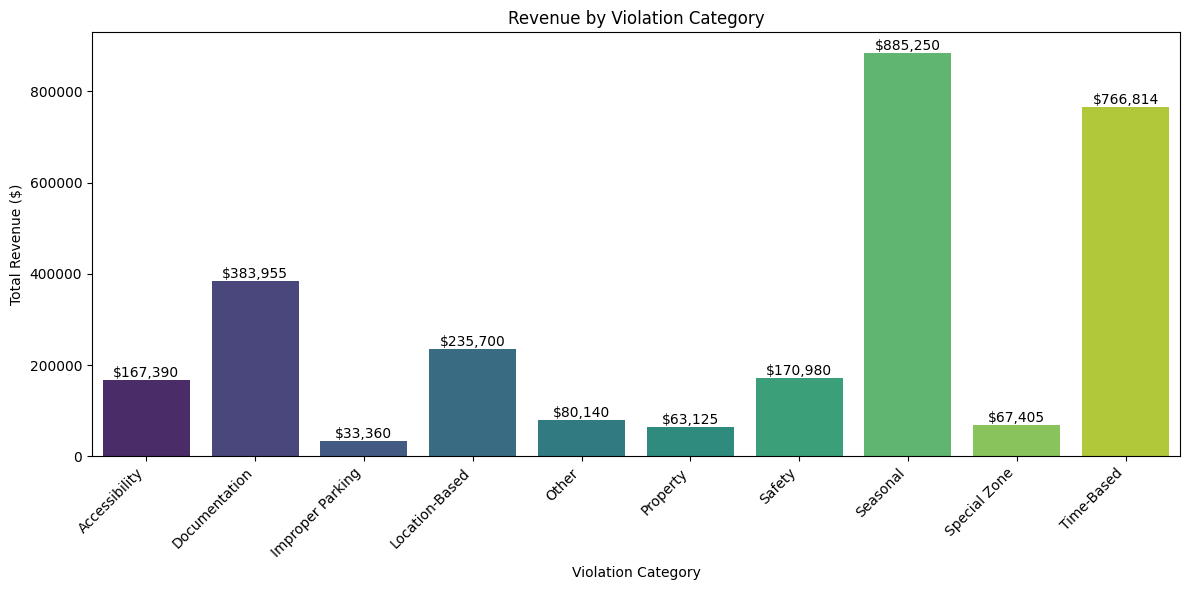


Average Fine by Category:
Accessibility  : $88.80
Safety         : $55.00
Property       : $44.99
Seasonal       : $38.63
Special Zone   : $25.06
Location-Based : $24.08
Improper Parking: $23.71
Other          : $23.20
Documentation  : $23.13
Time-Based     : $22.91


In [10]:
# Create a new figure
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(data=df.groupby('violation_category')['amount'].sum().reset_index(), 
            x='violation_category', 
            y='amount',
            palette='viridis')

# Customize the plot
plt.title('Revenue by Violation Category')
plt.xlabel('Violation Category')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
category_sums = df.groupby('violation_category')['amount'].sum()
for i, v in enumerate(category_sums):
    plt.text(i, v, f'${v:,.0f}', ha='center', va='bottom')

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

# Calculate and display average fines per category
print("\nAverage Fine by Category:")
category_stats = df.groupby('violation_category')['amount'].agg(['mean']).sort_values('mean', ascending=False)
for idx, row in category_stats.iterrows():
    print(f"{idx:<15}: ${row['mean']:.2f}")

1. Hotspot Mapping (Where Are Most Tickets Issued?)

Note: you may need to restart the kernel to use updated packages.


/var/folders/b6/8kmpl5ms6hsgvt6gg3fhkn3h0000gn/T/ipykernel_31270/1276145328.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette="coolwarm")


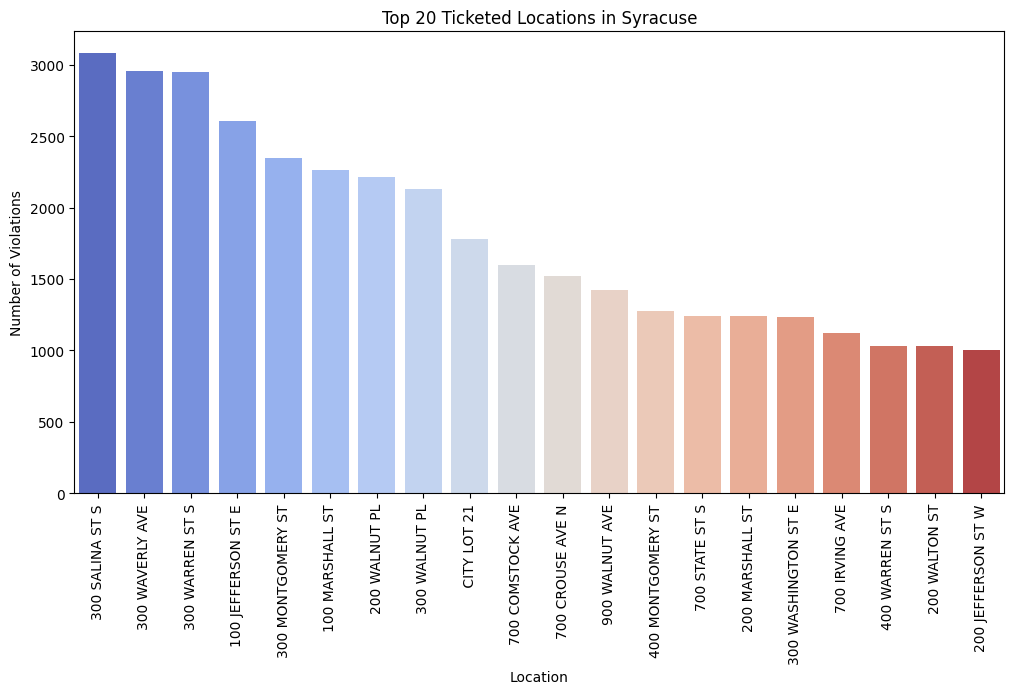

In [11]:
%pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Count violations per cleaned location
location_counts = df['cleaned_location'].value_counts().head(20)  # Top 20 locations

# Plot the data
plt.figure(figsize=(12,6))
sns.barplot(x=location_counts.index, y=location_counts.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Top 20 Ticketed Locations in Syracuse")
plt.xlabel("Location")
plt.ylabel("Number of Violations")
plt.show()

In [12]:
# Define thresholds for categorization
red_threshold = 1000
yellow_threshold = 100

# Categorize locations
def categorize_location(count):
    if count >= red_threshold:
        return 'red'
    elif count >= yellow_threshold:
        return 'yellow'
    else:
        return 'green'

# Apply categorization
location_counts_category = df['cleaned_location'].value_counts().apply(categorize_location)

# Display categorized locations
print("\nCategorized Locations:\n", location_counts_category)


Categorized Locations:
 cleaned_location
300 SALINA ST S         red
300 WAVERLY AVE         red
300 WARREN ST S         red
100 JEFFERSON ST E      red
300 MONTGOMERY ST       red
                      ...  
944 WESTCOTT ST       green
842 WESTCOTT ST       green
217 WILSON ST         green
1633 GENESEE ST E     green
600 RIDGEWAY AVE      green
Name: count, Length: 1979, dtype: object


In [13]:
# Count tickets in each location category
red_locations = df[df['cleaned_location'].isin(location_counts_category[location_counts_category == 'red'].index)].shape[0]
yellow_locations = df[df['cleaned_location'].isin(location_counts_category[location_counts_category == 'yellow'].index)].shape[0]
green_locations = df[df['cleaned_location'].isin(location_counts_category[location_counts_category == 'green'].index)].shape[0]

# Display results
print(f"Red Zone Tickets (>={red_threshold}): {red_locations:,}")
print(f"Yellow Zone Tickets (>={yellow_threshold}): {yellow_locations:,}")
print(f"Green Zone Tickets (<{yellow_threshold}): {green_locations:,}")

# Calculate percentages
total = red_locations + yellow_locations + green_locations
print(f"\nPercentages:")
print(f"Red Zones: {red_locations/total*100:.1f}%")
print(f"Yellow Zones: {yellow_locations/total*100:.1f}%")
print(f"Green Zones: {green_locations/total*100:.1f}%")

Red Zone Tickets (>=1000): 36,051
Yellow Zone Tickets (>=100): 39,812
Green Zone Tickets (<100): 20,854

Percentages:
Red Zones: 37.3%
Yellow Zones: 41.2%
Green Zones: 21.6%


visualizing on a map

In [14]:
%pip install folium
import folium

# Create a base map
m = folium.Map(location=[43.0481, -76.1474], zoom_start=13)

# Add categorized locations to the map
for loc, category in location_counts_category.items():
    # Get coordinates for this location from the first matching row
    loc_data = df[df['cleaned_location'] == loc].iloc[0]
    lat = loc_data['LAT']
    lon = loc_data['LONG']
    
    # Set the color based on the category
    if category == 'red':
        color = 'red'
    elif category == 'yellow':
        color = 'orange'
    else:
        color = 'grey'  
    
    # Add a marker to the map
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=loc
    ).add_to(m)

# Display the map
m


Note: you may need to restart the kernel to use updated packages.


2. Time-Based Trends (When Do Most Tickets Get Issued?)

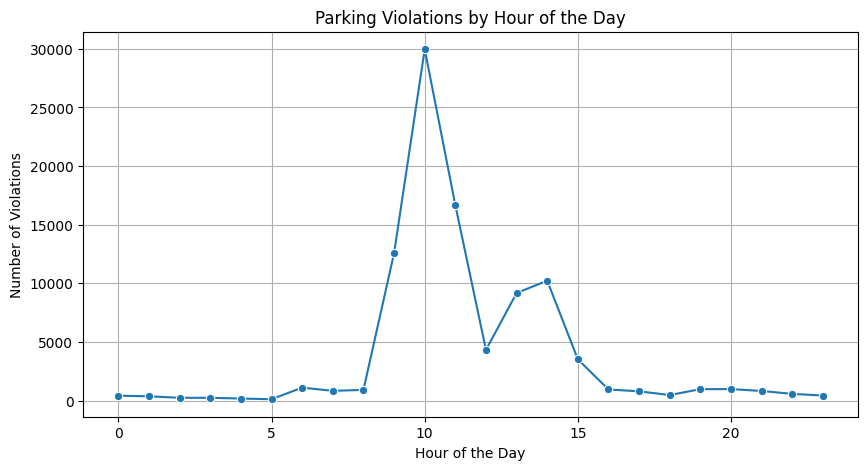

In [15]:
# Convert date column to datetime format
df['issued_date'] = pd.to_datetime(df['issued_date'], errors='coerce')

# Extract hour, day, month for analysis
df['hour'] = df['issued_date'].dt.hour
df['day_of_week'] = df['issued_date'].dt.day_name()
df['month'] = df['issued_date'].dt.month_name()

# Count violations per hour
hourly_violations = df['hour'].value_counts().sort_index()

# Plot violations by time of day
plt.figure(figsize=(10,5))
sns.lineplot(x=hourly_violations.index, y=hourly_violations.values, marker="o")
plt.title("Parking Violations by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Violations")
plt.grid()
plt.show()

3. Busiest Days for Tickets

/var/folders/b6/8kmpl5ms6hsgvt6gg3fhkn3h0000gn/T/ipykernel_31270/2780894702.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette="viridis")


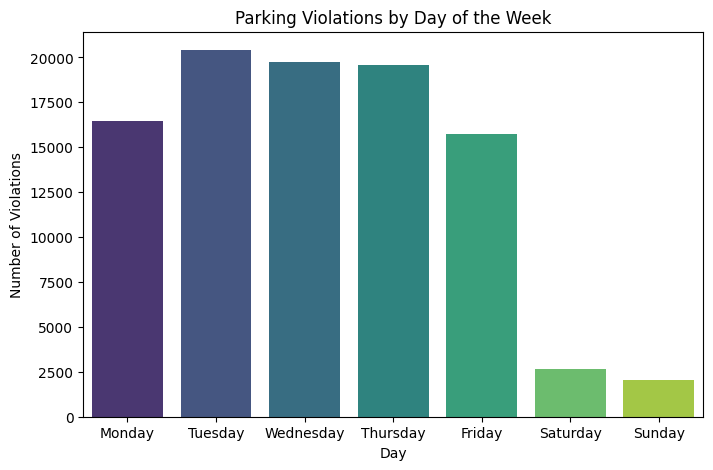

In [16]:
# Count violations per day of the week
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = df['day_of_week'].value_counts().reindex(weekday_order)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values, palette="viridis")
plt.title("Parking Violations by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Violations")
plt.show()

Busiest day of the month

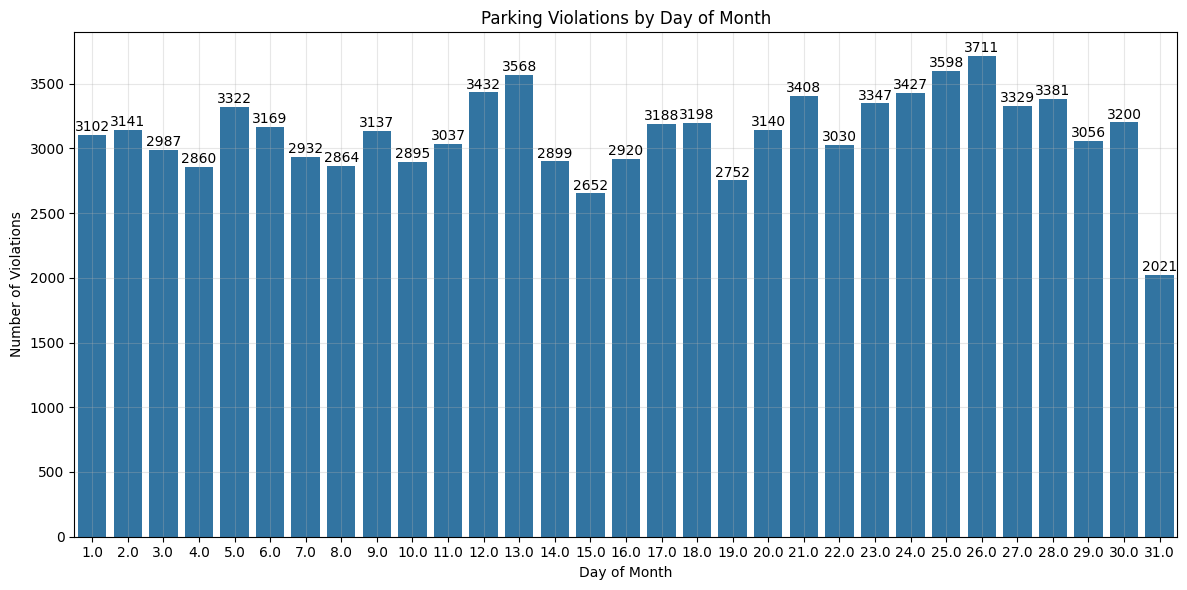


Day 26.0 has the most violations with 3711 tickets


In [17]:
# Extract day of month from issued_date
df['day_of_month'] = df['issued_date'].dt.day

# Count violations by day of month
monthly_pattern = df['day_of_month'].value_counts().sort_index()

# Create the visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_pattern.index, y=monthly_pattern.values)

# Customize the plot
plt.title('Parking Violations by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Violations')
plt.grid(True, alpha=0.3)

# Add value labels on top of bars
for i, v in enumerate(monthly_pattern.values):
    plt.text(i, v + 30, str(v), ha='center')

plt.tight_layout()
plt.show()

# Print the day with most violations
max_day = monthly_pattern.idxmax()
max_violations = monthly_pattern.max()
print(f"\nDay {max_day} has the most violations with {max_violations} tickets")

Seasonal trends

/var/folders/b6/8kmpl5ms6hsgvt6gg3fhkn3h0000gn/T/ipykernel_31270/1568711475.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index, y=monthly_counts.values, ax=ax1, palette='coolwarm')
/var/folders/b6/8kmpl5ms6hsgvt6gg3fhkn3h0000gn/T/ipykernel_31270/1568711475.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_monthly.index, y=seasonal_monthly.values, ax=ax2, palette='coolwarm')


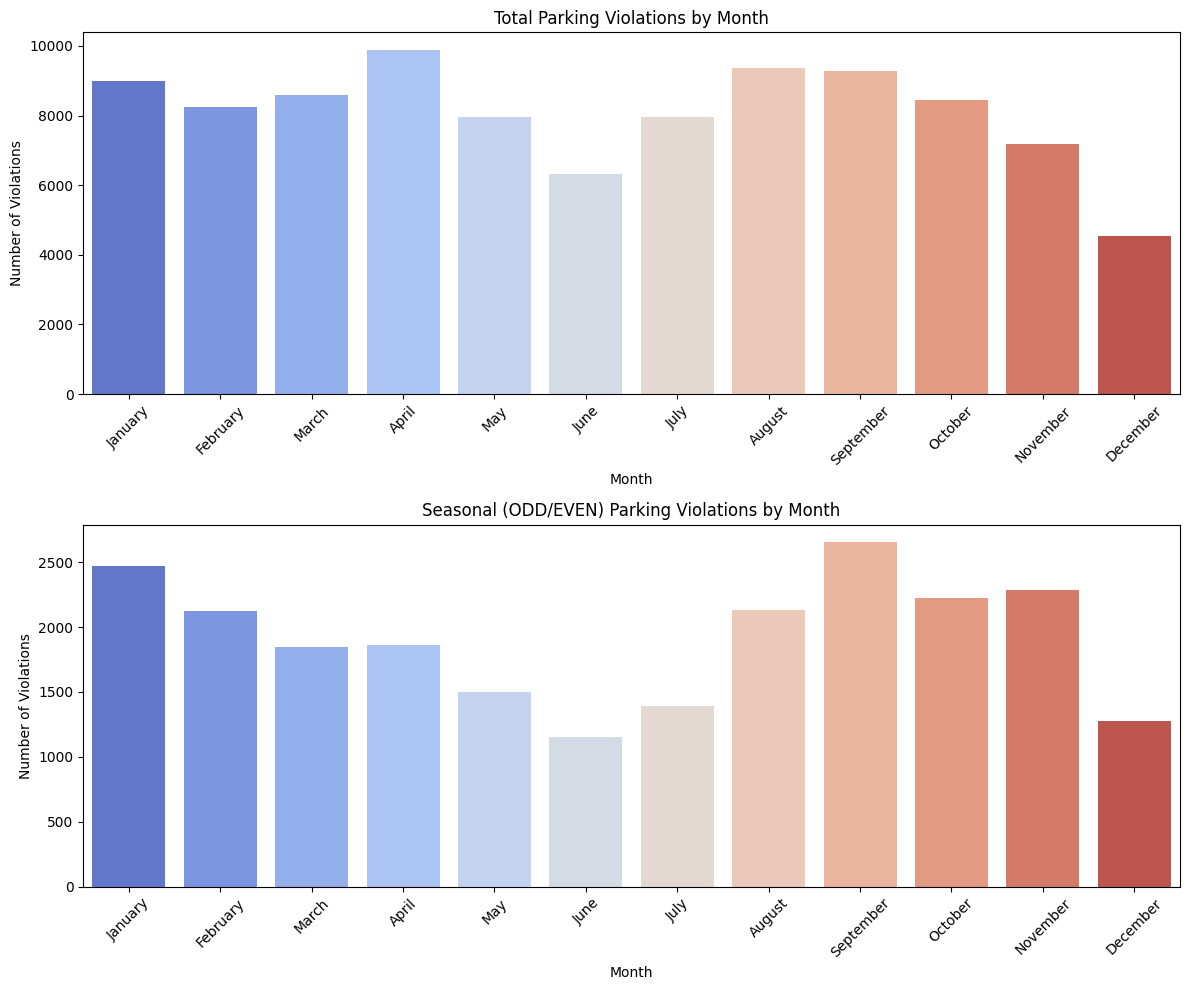


Seasonal Analysis:
Winter months (Dec-Mar) violations: 30,343
Summer months (Jun-Sep) violations: 32,907
Difference (Winter - Summer): -2,564


In [18]:
# Convert month names to numbers for proper ordering
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Count violations by month
monthly_counts = df['month'].value_counts().reindex(month_order)

# Create figure and axis for two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Total violations by month
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, ax=ax1, palette='coolwarm')
ax1.set_title('Total Parking Violations by Month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Violations')
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Seasonal violations (focus on ODD/EVEN parking rules)
seasonal_violations = df[df['description'].str.contains('ODD/EVEN PARKING', na=False)]
seasonal_monthly = seasonal_violations['month'].value_counts().reindex(month_order)

sns.barplot(x=seasonal_monthly.index, y=seasonal_monthly.values, ax=ax2, palette='coolwarm')
ax2.set_title('Seasonal (ODD/EVEN) Parking Violations by Month')
ax2.set_xlabel('Month')
ax2.set_ylabel('Number of Violations')
ax2.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Print some statistics
print("\nSeasonal Analysis:")
winter_months = ['December', 'January', 'February', 'March']
summer_months = ['June', 'July', 'August', 'September']

winter_violations = df[df['month'].isin(winter_months)]['ticket_number'].count()
summer_violations = df[df['month'].isin(summer_months)]['ticket_number'].count()

print(f"Winter months (Dec-Mar) violations: {winter_violations:,}")
print(f"Summer months (Jun-Sep) violations: {summer_violations:,}")
print(f"Difference (Winter - Summer): {winter_violations - summer_violations:,}")

4. How Much Money Does the City Make from Parking Tickets?


Revenue Analysis Summary:
Total Revenue: $2,854,119.50
Average Fine: $29.51

Revenue by Violation Category:
                         sum  count       mean
violation_category                            
Seasonal            885250.0  22918  38.626844
Time-Based          766814.5  33465  22.913925
Documentation       383955.0  16597  23.134000
Location-Based      235700.0   9789  24.078047
Safety              170980.0   3109  54.995175
Accessibility       167390.0   1885  88.801061
Other                80140.0   3454  23.202085
Special Zone         67405.0   2690  25.057621
Property             63125.0   1403  44.992872
Improper Parking     33360.0   1407  23.710021

Revenue by Day of Week:
day_of_week
Monday       477645.0
Tuesday      591475.0
Wednesday    574169.5
Thursday     564595.0
Friday       465260.0
Saturday      93680.0
Sunday        87110.0
Name: amount, dtype: float64


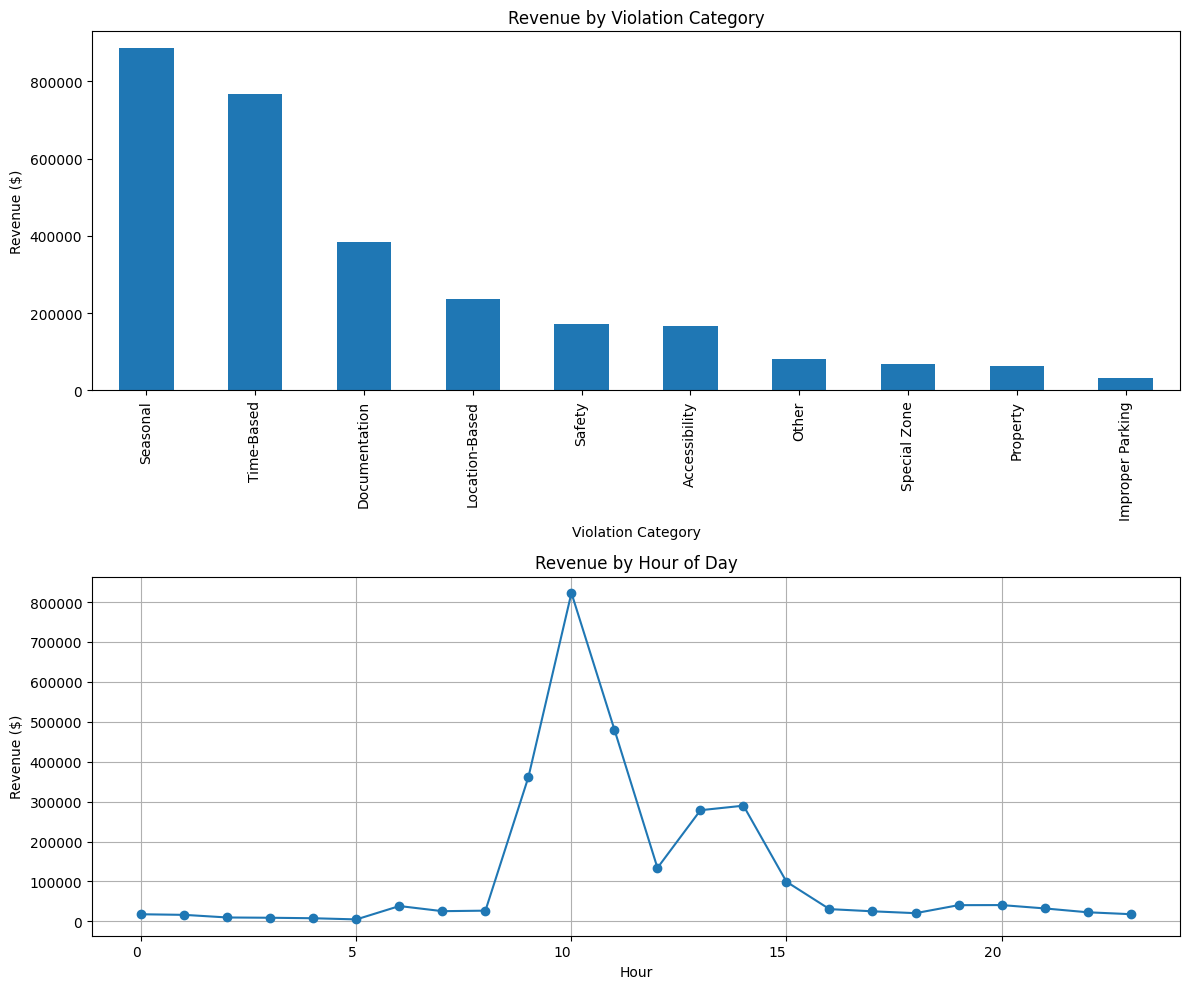

In [19]:
# Calculate total revenue
total_revenue = df['amount'].sum()

# Calculate average fine amount
average_fine = df['amount'].mean()

# Group revenue by violation category
category_revenue = df.groupby('violation_category')['amount'].agg(['sum', 'count', 'mean'])
category_revenue = category_revenue.sort_values('sum', ascending=False)

# Calculate revenue by day of week
daily_revenue = df.groupby('day_of_week')['amount'].sum().reindex(weekday_order)

# Calculate revenue by hour
hourly_revenue = df.groupby('hour')['amount'].sum()

# Print summary statistics
print(f"\nRevenue Analysis Summary:")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Average Fine: ${average_fine:.2f}")

print("\nRevenue by Violation Category:")
print(category_revenue)

print("\nRevenue by Day of Week:")
print(daily_revenue)

# Visualize revenue trends
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot revenue by violation category
category_revenue['sum'].plot(kind='bar', ax=ax1)
ax1.set_title('Revenue by Violation Category')
ax1.set_xlabel('Violation Category')
ax1.set_ylabel('Revenue ($)')
plt.xticks(rotation=45, ha='right')

# Plot revenue by hour of day
hourly_revenue.plot(kind='line', marker='o', ax=ax2)
ax2.set_title('Revenue by Hour of Day')
ax2.set_xlabel('Hour')
ax2.set_ylabel('Revenue ($)')
ax2.grid(True)

plt.tight_layout()
plt.show()

Total revenue over time


Revenue Statistics:
Total Revenue: $2,853,934.50
Average Monthly Revenue: $101,926.23
Highest Revenue Month: 2024-02 ($164,765.00)


/var/folders/b6/8kmpl5ms6hsgvt6gg3fhkn3h0000gn/T/ipykernel_31270/969514294.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['issued_date'].dt.to_period('M')


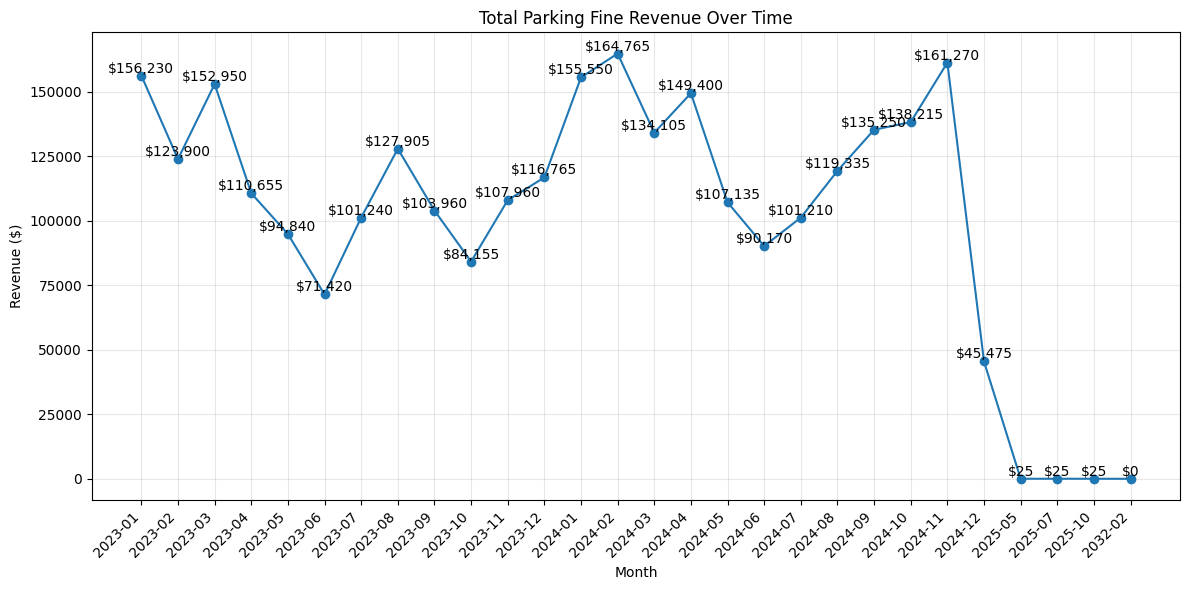

In [20]:
# Group revenue by month and year
df['year_month'] = df['issued_date'].dt.to_period('M')
monthly_revenue = df.groupby('year_month')['amount'].sum().reset_index()
monthly_revenue['year_month'] = monthly_revenue['year_month'].astype(str)

# Create the visualization
plt.figure(figsize=(12, 6))

# Plot monthly revenue
plt.plot(monthly_revenue['year_month'], monthly_revenue['amount'], marker='o')

# Customize the plot
plt.title('Total Parking Fine Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.grid(True, alpha=0.3)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of points
for i, v in enumerate(monthly_revenue['amount']):
    plt.text(i, v, f'${v:,.0f}', ha='center', va='bottom')

# Calculate and print some statistics
total_revenue = monthly_revenue['amount'].sum()
average_monthly_revenue = monthly_revenue['amount'].mean()
max_revenue_month = monthly_revenue.loc[monthly_revenue['amount'].idxmax(), 'year_month']
max_revenue = monthly_revenue['amount'].max()

print(f"\nRevenue Statistics:")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Average Monthly Revenue: ${average_monthly_revenue:,.2f}")
print(f"Highest Revenue Month: {max_revenue_month} (${max_revenue:,.2f})")

plt.tight_layout()
plt.show()

unpaid ticket analysis

In [21]:
# Get unique values in status column
unique_statuses = df['status'].unique()
print("Unique Status Values:")
for status in sorted(unique_statuses):
    print(status)

Unique Status Values:
ADMINISTRATIVE REVIEW
Adjudicate 30 days Pay or Appeal
Adjudication Default Collections
Adjudication Dismissed
Adjudication Partial 
Adjudication Pending 
Adjudication Sustained
Appeal Approved
Appeal Denied 
Appeal Pending 
Collections
Fourth Notice
Hearing Appeal Pending
In Bankruptcy
Issued
Paid In Collections
Paid In Full
Promise To Pay
Promise To Pay - Default
Second Notice
Sent to Collections
Third Notice
Void Approved
Void Pending
Written Off


In [22]:
def categorize_status(status):
    status_categories = {
        'Initial': ['Issued', 'ADMINISTRATIVE REVIEW'],
        'Notice': ['Second Notice', 'Third Notice', 'Fourth Notice'],
        'Adjudication': ['Adjudicate 30 days Pay or Appeal', 'Adjudication Pending', 
                        'Adjudication Sustained', 'Adjudication Dismissed', 
                        'Adjudication Partial', 'Adjudication Default Collections'],
        'Appeal': ['Appeal Pending', 'Hearing Appeal Pending', 
                  'Appeal Approved', 'Appeal Denied'],
        'Payment': ['Paid In Full', 'Promise To Pay', 'Promise To Pay - Default'],
        'Collections': ['Collections', 'Sent to Collections', 'Paid In Collections'],
        'Special': ['In Bankruptcy', 'Written Off', 'Void Approved', 'Void Pending']
    }
    
    for category, status_list in status_categories.items():
        if status in status_list:
            return category
    return 'Other'

# Create new column with status categories
df['status_category'] = df['status'].apply(categorize_status)

# Display distribution of status categories
print("\nStatus Categories Distribution:")
print(df['status_category'].value_counts())


Status Categories Distribution:
status_category
Payment         61745
Collections     20049
Adjudication     5271
Initial          3890
Notice           2702
Special          1723
Other            1272
Appeal             65
Name: count, dtype: int64


Unpaid Tickets Analysis: How many tickets remain unpaid, and which violations are most likely to go unpaid?


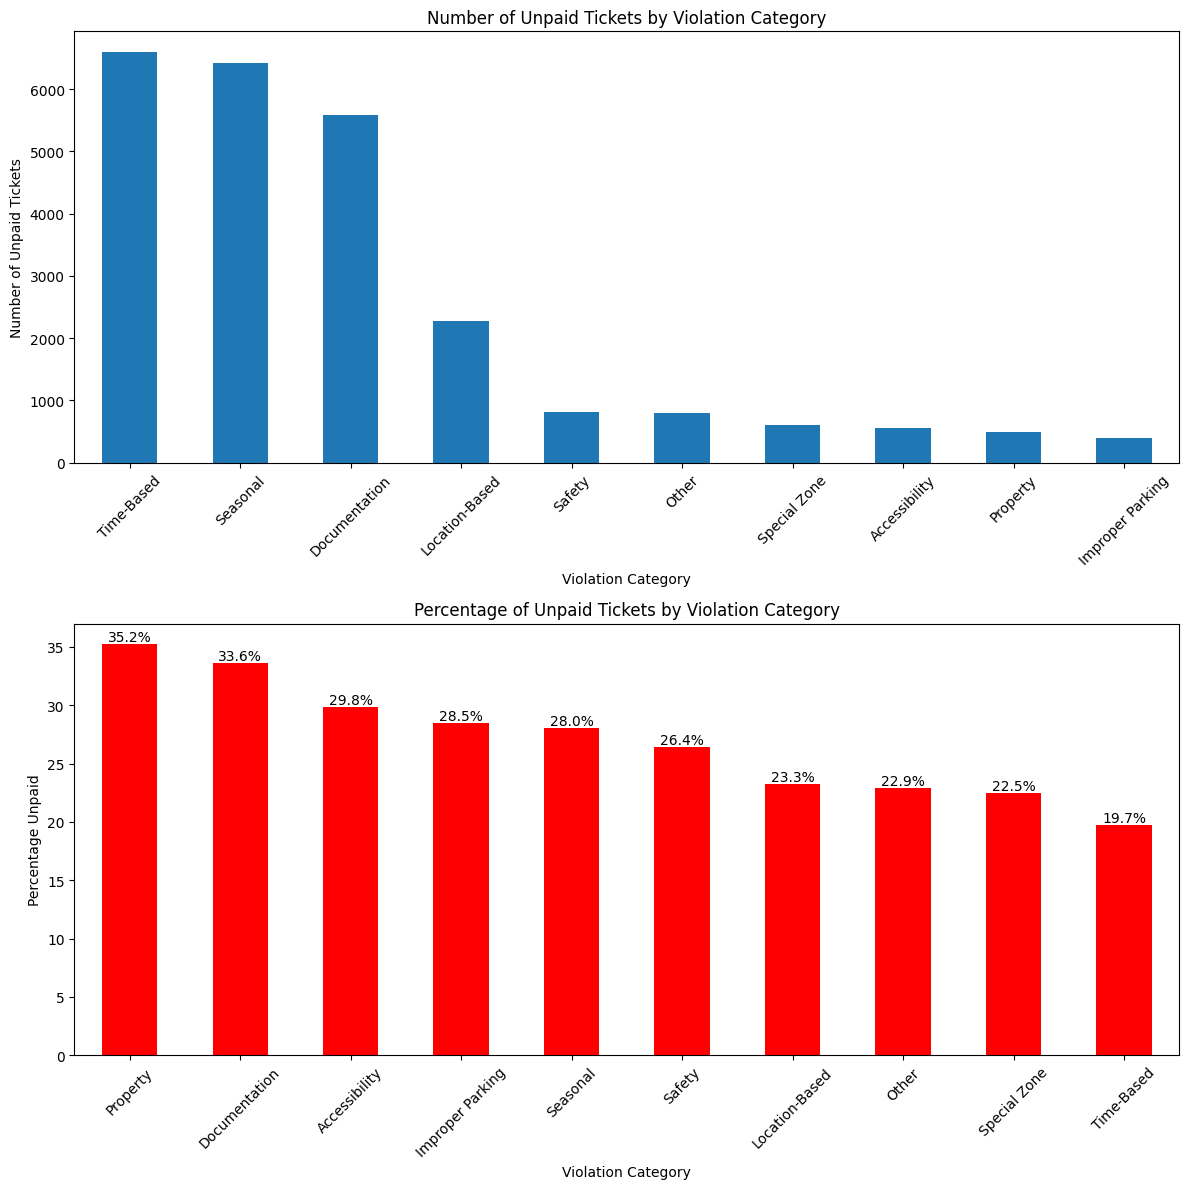


Unpaid Ticket Analysis:
Total Tickets: 96,717
Unpaid Tickets: 24,550
Percentage Unpaid: 25.4%

Categories with Highest Unpaid Rates:
Property: 35.2%
Documentation: 33.6%
Accessibility: 29.8%
Improper Parking: 28.5%
Seasonal: 28.0%


In [23]:
# Define unpaid statuses (excluding Paid in Full, Void, and Dismissed)
unpaid_statuses = ['Collections', 'Issued', 'Second Notice', 'Third Notice', 'Fourth Notice', 
                   'Sent to Collections', 'Adjudicate 30 days Pay or Appeal']

# Calculate unpaid tickets
unpaid_tickets = df[df['status'].isin(unpaid_statuses)]
total_tickets = len(df)
unpaid_count = len(unpaid_tickets)

# Calculate unpaid tickets by violation category
unpaid_by_category = unpaid_tickets['violation_category'].value_counts()
total_by_category = df['violation_category'].value_counts()

# Calculate percentage of unpaid tickets for each category
unpaid_percentage = (unpaid_by_category / total_by_category * 100).sort_values(ascending=False)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot 1: Number of unpaid tickets by category
unpaid_by_category.plot(kind='bar', ax=ax1)
ax1.set_title('Number of Unpaid Tickets by Violation Category')
ax1.set_xlabel('Violation Category')
ax1.set_ylabel('Number of Unpaid Tickets')
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Percentage of unpaid tickets by category
unpaid_percentage.plot(kind='bar', ax=ax2, color='red')
ax2.set_title('Percentage of Unpaid Tickets by Violation Category')
ax2.set_xlabel('Violation Category')
ax2.set_ylabel('Percentage Unpaid')
ax2.tick_params(axis='x', rotation=45)

# Add value labels on top of bars
for i, v in enumerate(unpaid_percentage):
    ax2.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nUnpaid Ticket Analysis:")
print(f"Total Tickets: {total_tickets:,}")
print(f"Unpaid Tickets: {unpaid_count:,}")
print(f"Percentage Unpaid: {(unpaid_count/total_tickets*100):.1f}%")

print("\nCategories with Highest Unpaid Rates:")
for category, percentage in unpaid_percentage.head().items():
    print(f"{category}: {percentage:.1f}%")

What percentage of tickets actually get dismissed? Should I contest my ticket?

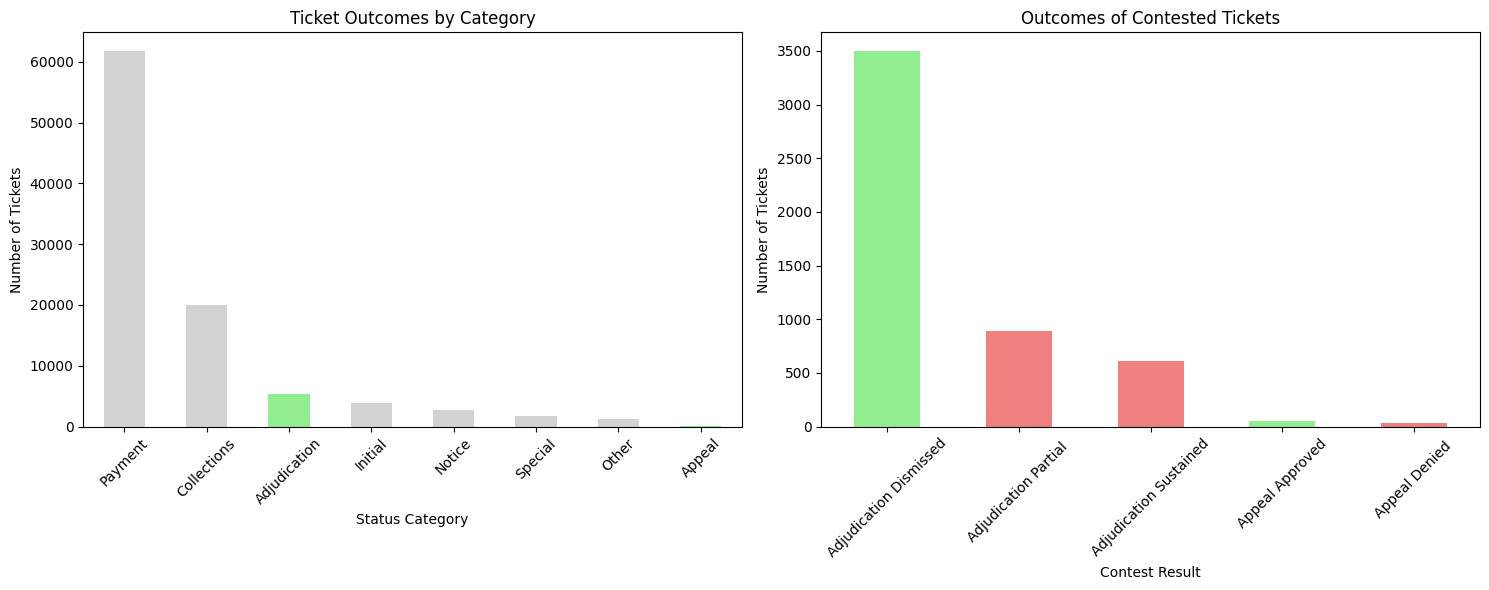


Ticket Dismissal Analysis:
Overall dismissal rate: 5.44%
Success rate when contested: 103.24%

Detailed contest outcomes:
Adjudication Dismissed: 68.70%
Adjudication Partial : 17.52%
Adjudication Sustained: 12.06%
Appeal Approved: 1.00%
Appeal Denied : 0.73%


In [24]:
# Calculate ticket outcomes
outcome_counts = df['status'].value_counts()
outcome_percentages = (outcome_counts / len(df) * 100).round(2)

# Group statuses into meaningful categories for analysis
dismissal_statuses = ['Adjudication Dismissed', 'Void Approved', 'Appeal Approved']
contested_statuses = ['Adjudication Dismissed', 'Adjudication Sustained', 'Appeal Approved', 
                     'Appeal Denied ', 'Adjudication Partial ']

# Calculate dismissal statistics
dismissed_tickets = df[df['status'].isin(dismissal_statuses)]
contested_tickets = df[df['status'].isin(contested_statuses)]

dismissal_rate = len(dismissed_tickets) / len(df) * 100
contest_success_rate = len(dismissed_tickets) / len(contested_tickets) * 100 if len(contested_tickets) > 0 else 0

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Overall Ticket Outcomes
status_categories = df['status_category'].value_counts()
status_percentages = (status_categories / len(df) * 100).round(2)

colors = ['lightgreen' if cat in ['Adjudication', 'Appeal'] else 'lightgray' for cat in status_categories.index]
status_categories.plot(kind='bar', ax=ax1, color=colors)
ax1.set_title('Ticket Outcomes by Category')
ax1.set_xlabel('Status Category')
ax1.set_ylabel('Number of Tickets')
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Contest Success Rate
contest_outcomes = df[df['status'].isin(contested_statuses)]['status'].value_counts()
contest_percentages = (contest_outcomes / len(contested_tickets) * 100).round(2)
colors = ['lightgreen' if 'Dismissed' in status or 'Approved' in status else 'lightcoral' for status in contest_outcomes.index]
contest_outcomes.plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('Outcomes of Contested Tickets')
ax2.set_xlabel('Contest Result')
ax2.set_ylabel('Number of Tickets')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print statistics
print(f"\nTicket Dismissal Analysis:")
print(f"Overall dismissal rate: {dismissal_rate:.2f}%")
print(f"Success rate when contested: {contest_success_rate:.2f}%")
print("\nDetailed contest outcomes:")
for status, percentage in contest_percentages.items():
    print(f"{status}: {percentage:.2f}%")

Most Unusual Ticket (Lowest or Highest Fine)


In [25]:
# Find the unique fine amounts and their frequencies
fine_amounts = df['amount'].value_counts().sort_index()
print("Unique Fine Amounts:")
for amount, count in fine_amounts.items():
    print(f"${amount:.2f}: {count:,} tickets")

# Find tickets with highest fine amount
highest_fine = df['amount'].max()
highest_fine_tickets = df[df['amount'] == highest_fine]
print(f"\nHighest Fine Amount: ${highest_fine:.2f}")
print("\nTickets with Highest Fine:")
print(highest_fine_tickets[['description', 'amount', 'cleaned_location', 'violation_category']].head())

# Find tickets with lowest non-zero fine amount
lowest_fine = df[df['amount'] > 0]['amount'].min()
lowest_fine_tickets = df[df['amount'] == lowest_fine]
print(f"\nLowest Non-Zero Fine Amount: ${lowest_fine:.2f}")
print("\nTickets with Lowest Fine:")
print(lowest_fine_tickets[['description', 'amount', 'cleaned_location', 'violation_category']].head())

# Calculate statistics
print("\nFine Amount Statistics:")
print(f"Average Fine: ${df['amount'].mean():.2f}")
print(f"Median Fine: ${df['amount'].median():.2f}")
print(f"Most Common Fine: ${df['amount'].mode()[0]:.2f}")

Unique Fine Amounts:
$-25.00: 1 tickets
$-5.00: 1 tickets
$0.00: 5,820 tickets
$5.00: 17 tickets
$10.00: 783 tickets
$15.00: 40 tickets
$20.00: 7 tickets
$24.50: 1 tickets
$25.00: 74,950 tickets
$30.00: 3 tickets
$35.00: 1 tickets
$40.00: 13 tickets
$50.00: 24 tickets
$60.00: 13,391 tickets
$75.00: 2 tickets
$85.00: 10 tickets
$100.00: 1,648 tickets
$120.00: 2 tickets
$125.00: 3 tickets

Highest Fine Amount: $125.00

Tickets with Highest Fine:
                                   description  amount  \
51141  OVERTIME PRKNG MON-SAT 9AM-6PM CO15-383   125.0   
69423  OVERTIME PRKNG MON-SAT 9AM-6PM CO15-383   125.0   
69427         UNINSPECTED/ ALL TIMES VTL 306-B   125.0   

                cleaned_location violation_category  
51141             900 WALNUT AVE         Time-Based  
69423                SALINA ST S         Time-Based  
69427   DESTINY USA NORTH GARAGE      Documentation  

Lowest Non-Zero Fine Amount: $5.00

Tickets with Lowest Fine:
                                 descrip

6. AI-Powered Ticket Predictor

In [26]:
import folium
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    """Calculate distance between two points on Earth"""
    R = 6371  # Earth's radius in kilometers
    
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    
    return distance

def find_nearby_parking_zones(input_lat, input_long, radius_km=1):
    """Find and display parking zones near the input location"""
    
    # Find the nearest location in our dataset if input location isn't in dataset
    nearest_loc = None
    min_distance = float('inf')
    
    for _, row in df.iterrows():
        dist = haversine_distance(input_lat, input_long, row['LAT'], row['LONG'])
        if dist < min_distance:
            min_distance = dist
            nearest_loc = (row['LAT'], row['LONG'])
    
    # Use either input location or nearest location as center
    center_lat = input_lat if min_distance > radius_km else nearest_loc[0]
    center_long = input_long if min_distance > radius_km else nearest_loc[1]
    
    # Create base map
    m = folium.Map(location=[center_lat, center_long], zoom_start=15)
    
    # Add marker for input/search location
    folium.Marker(
        [input_lat, input_long],
        popup='Search Location',
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)
    
    # Add nearby parking zones
    location_counts = df['cleaned_location'].value_counts()
    
    for idx, row in df.drop_duplicates(subset=['cleaned_location']).iterrows():
        loc_lat, loc_long = row['LAT'], row['LONG']
        
        # Check if location is within radius
        if haversine_distance(center_lat, center_long, loc_lat, loc_long) <= radius_km:
            count = location_counts[row['cleaned_location']]
            
            # Determine zone color based on ticket count
            if count >= 1000:  # red zone
                color = 'red'
                risk = 'High Risk'
            elif count >= 100:  # yellow zone
                color = 'orange'
                risk = 'Medium Risk'
            else:  # green zone
                color = 'green'
                risk = 'Low Risk'
            
            # Add circle marker
            folium.CircleMarker(
                location=[loc_lat, loc_long],
                radius=8,
                color=color,
                fill=True,
                fill_color=color,
                fill_opacity=0.7,
                popup=f"Location: {row['cleaned_location']}<br>Tickets: {count}<br>Risk Level: {risk}"
            ).add_to(m)
    
    return m

# Example usage (you can replace with any lat/long):
map_display = find_nearby_parking_zones(43.045388, -76.132693)
map_display